In [1]:
import matplotlib as mpl
import pandas as pd
from utils import *
from dataset_creators import *
from utils import *
from knn_regressor import *
from MLP_regressor import *
from knn_classifier import *

from sklearn import svm

mpl.rcParams['figure.dpi']= 125


# Vyhodnotenie pre smer 315
 Načítame si trénovacie a testovacie dáta ktoré sú rozdelené v pomere 80:20.

In [2]:
train_set = pd.read_csv('datasets/processed/train_set_3m_processed.csv')
test_set = pd.read_csv('datasets/processed/test_set_3m_processed.csv')
train_set = extract_direction(train_set, '315')
test_set = extract_direction(test_set, '315')
T_train_class = get_three_classes(train_set, '315', [5000, 15000])
T_test_class = get_three_classes(test_set, '315', [5000, 15000])

print(train_set.shape, test_set.shape)

(1218, 20) (406, 20)


Normalizujeme dáta tak, aby mean bol 0 a std. 1.

In [3]:
train_set = extract_direction(train_set, '315')
X_train, T_train = get_XT(train_set, '315')
X_test, T_test = get_XT(test_set, '315')

X_test = normalize(X_test)
X_train = normalize(X_train)

train_set.head()

,PC1_315_h,PC2_315_h,PC3_315_h,PC4_315_h,PC5_315_h,PC1_315_s,PC2_315_s,PC3_315_s,PC4_315_s,PC5_315_s,PC1_315_v,PC2_315_v,PC3_315_v,PC4_315_v,PC5_315_v,var_315_lap,var_315_sobelx,var_315_sobely,315,hour
0,-0.794045,-1.254407,3.992149,-1.443649,1.957012,-8.172071,2.846392,0.414865,-6.030452,-1.559980,-12.655697,11.990424,3.598689,-5.653828,-1.291818,118.593062,17981.619604,263637.475490,3800.0,8
1,-1.534787,-1.901219,0.408430,-0.620878,-1.647550,-5.775243,-3.544446,-0.609005,7.075318,-3.559317,-2.565500,-7.975048,-5.858713,0.735517,5.073535,187.555551,39490.093268,287523.727924,20900.0,10
2,-0.763798,0.391916,0.059995,-2.551872,-3.766982,5.290093,-7.796091,0.615531,4.241441,0.176785,-6.367235,8.863994,0.168942,-4.702589,-1.278025,236.160766,53251.525443,371787.940794,14500.0,9
3,-0.921421,1.227598,1.354789,-1.996571,-2.776263,-4.773868,-3.333225,1.115900,-0.846853,-2.804166,0.453230,-5.413444,-0.699407,0.924630,1.161485,508.332249,108913.350858,780114.281337,20900.0,13
4,-2.619502,-2.010913,5.677085,-5.023627,-1.654300,-6.022311,1.192882,-2.450600,3.778238,-1.396398,-1.802771,-10.381734,-1.536699,0.798249,2.567744,94.821941,9978.733755,169198.218605,10500.0,14


## Regresia

### Trenovanie KNN
-Vyberiem najlepsie k, a metriku na zaklade MAE validacnej mnoziny. 

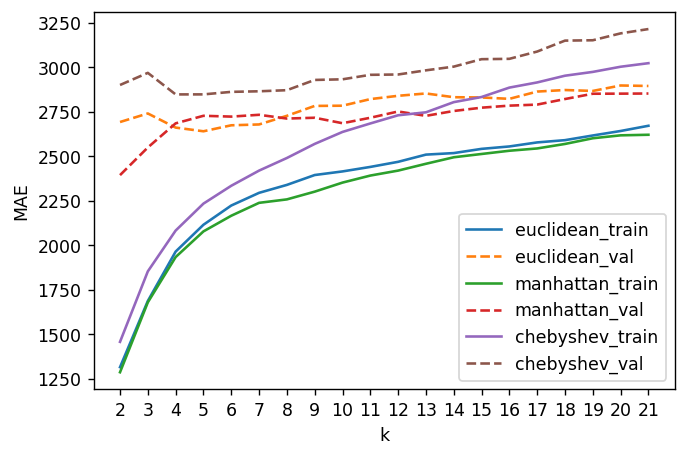

In [4]:
plot_hyperparameters_regressor(X_train, T_train, 0.8)

### Testovanie KNN

In [5]:
model = KNeighborsRegressor(n_neighbors=2, metric='euclidean')
model.fit(X_train, T_train)
Y_test = model.predict(X_test)

In [6]:
print("Priemerna absolutna chyba (MAE) na testovacej mnozine: {:.2f}".format(np.mean(np.abs(Y_test-T_test))))

Priemerna absolutna chyba (MAE) na testovacej mnozine: 2146.02


### Trenovanie MLP

epochs: 0 || train_loss: 2562953.28 val_loss: 953535.80 | train_acc: 14233.50 val_acc: 13446.01
epochs: 100 || train_loss: 2174581.72 val_loss: 809473.18 | train_acc: 12933.98 val_acc: 12184.27
epochs: 200 || train_loss: 1873798.69 val_loss: 695547.87 | train_acc: 11811.71 val_acc: 11115.33
epochs: 300 || train_loss: 1602442.41 val_loss: 596767.34 | train_acc: 10764.94 val_acc: 10157.70
epochs: 400 || train_loss: 1362945.31 val_loss: 509452.89 | train_acc: 9953.64 val_acc: 9431.13
epochs: 500 || train_loss: 1147112.26 val_loss: 433586.79 | train_acc: 9097.75 val_acc: 8664.64
epochs: 600 || train_loss: 959016.65 val_loss: 366722.30 | train_acc: 8273.84 val_acc: 7951.09
epochs: 700 || train_loss: 796694.83 val_loss: 308604.33 | train_acc: 7451.86 val_acc: 7284.54
epochs: 800 || train_loss: 654342.55 val_loss: 257864.85 | train_acc: 6691.89 val_acc: 6642.30
epochs: 900 || train_loss: 526730.47 val_loss: 215944.23 | train_acc: 5956.66 val_acc: 6032.04
epochs: 1000 || train_loss: 424769.29 

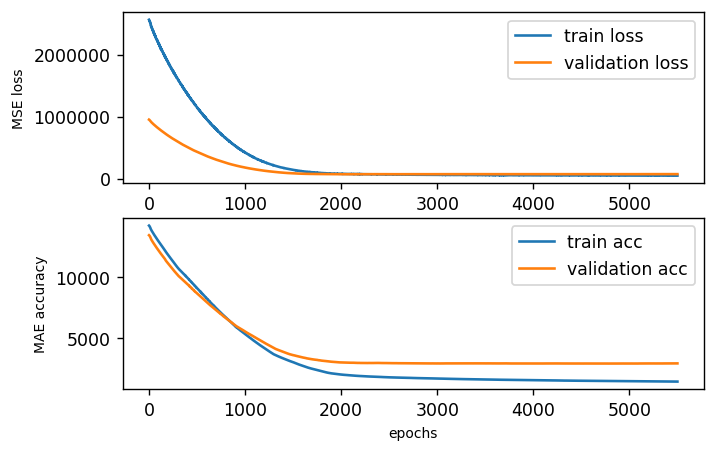

In [7]:
mlp = MLP_Regressor(19,125,1)

criterion = F.mse_loss
optimizer = optim.Adam(mlp.parameters(), lr=0.01)#, momentum=0.5)
e_train_loss, e_val_loss, e_train_acc, e_val_acc = mlp.fit(5500, X_train, T_train, criterion, optimizer, 100, 0.8, True)
plot_NN_history(e_train_loss, e_val_loss, e_train_acc, e_val_acc)

In [19]:
mlp = MLP_Regressor(19,125,1)

criterion = F.mse_loss
optimizer = optim.Adam(mlp.parameters(), lr=0.01)
e_train_loss, e_val_loss, e_train_acc, e_val_acc = mlp.fit(5500, X_train, T_train, criterion, optimizer, 128, 1)
Y_test = mlp(torch.from_numpy(X_test).float())
Y_test = Y_test.data.numpy().flatten()
print("Priemerna absolutna chyba (MAE) na testovacej mnozine: {:.2f}".format(np.mean(np.abs(Y_test-T_test))))

epochs: 0 || train_loss: 2017973.18 | train_acc: 14075.75
epochs: 100 || train_loss: 1720695.58 | train_acc: 12791.78
epochs: 200 || train_loss: 1489879.57 | train_acc: 11705.34
epochs: 300 || train_loss: 1270470.63 | train_acc: 10650.48
epochs: 400 || train_loss: 1071307.20 | train_acc: 9855.42
epochs: 500 || train_loss: 909360.55 | train_acc: 9049.32
epochs: 600 || train_loss: 754775.51 | train_acc: 8218.18
epochs: 700 || train_loss: 633550.26 | train_acc: 7422.19
epochs: 800 || train_loss: 514338.83 | train_acc: 6680.40
epochs: 900 || train_loss: 418037.81 | train_acc: 5961.63
epochs: 1000 || train_loss: 338112.13 | train_acc: 5358.45
epochs: 1100 || train_loss: 271851.65 | train_acc: 4792.07
epochs: 1200 || train_loss: 218413.08 | train_acc: 4260.82
epochs: 1300 || train_loss: 178920.99 | train_acc: 3761.32
epochs: 1400 || train_loss: 146586.70 | train_acc: 3430.23
epochs: 1500 || train_loss: 121674.35 | train_acc: 3141.82
epochs: 1600 || train_loss: 106524.00 | train_acc: 2860.82


## Klasifikacia

### KNN klasifikator

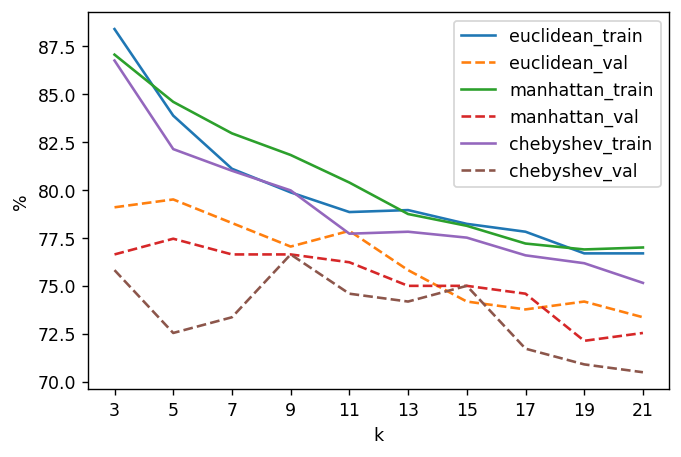

In [9]:
plot_hyperparameters_classifier(X_train, T_train_class, 0.8)

In [10]:
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train, T_train_class)
Y_test = model.predict(X_test)

In [11]:
print("Uspesnost na testovacej mnozine = {:.2f}%".format(np.mean(T_test_class == Y_test)*100))

Uspesnost na testovacej mnozine = 78.08%


In [13]:
confusion_matrix(T_test_class, Y_test)

array([[ 78,  13,   5],
       [ 17,  69,  27],
       [  2,  25, 170]])

### SVM

In [14]:
N = int(0.8 *X_train.shape[0])

svc = svm.SVC(C=10, gamma=0.05, kernel='rbf')
svc.fit(X_train[:N], T_train_class[:N])


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
print("Uspesnost na trenovacej mnozine = {:.2f}%".format(svc.score(X_train[:N], T_train_class[:N])))

print("Uspesnost na validacnej mnozine = {:.2f}%".format(svc.score(X_train[N:], T_train_class[N:])))

Uspesnost na trenovacej mnozine = 0.93%
Uspesnost na validacnej mnozine = 0.75%


In [16]:
svc = svm.SVC(C=10, gamma=0.05, kernel='rbf')
svc.fit(X_train, T_train_class)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
print("Uspesnost na testovacej mnozine = {:.2f}%".format(svc.score(X_test, T_test_class)))

Uspesnost na testovacej mnozine = 0.83%


In [18]:
Y_test = svc.predict(X_test)
confusion_matrix(T_test_class, Y_test)

array([[ 80,  12,   4],
       [  9,  83,  21],
       [  0,  21, 176]])